<a href="https://colab.research.google.com/github/ddenebb/programacio_numerica/blob/Appproach-3-for-review/Tasca_M3_T02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Exercise 1

Download the data set Airlines Delay: Airline on-time statistics and delay causes and load it into a Pandas Dataframe. Explore the data it contains, briefly explain which variables are there and stick only to the columns you consider relevant. Justify your choice.

### Important

The dimension of the dataset must be randomly reduced in order to obtain a 200,000 record only version. All exercises should be done on this reduced dataset.

### Airline Dataset Variables description:

Below follows a table with the Airline Dataset Variables definition.\
IATA:  International Air Transport Association\
NAS : National Aviation System\
Carrier: an organization transporting passengers and cargo by aircraft \
Delay causes:
- CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
- WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
- NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
 -LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.



| Number | Name | Description |Data type
| ----------- | ----------- | ----------- |----------- |
| 0 | Unnamed: 0 | unknown |int64  
| 1 | Year | year of the flight | int64  
| 2 | Month | month of the flight | int64  
| 3 | DayofMonth| day of the month (1 to 31) | int64  
| 4 | DayOfWeek| day of the week 1 (Monday) - 7 (Sunday)| int64  
| 5 | DepTime| actual departure time (local, hhmm) |float64
| 6 | CRSDepTime| scheduled departure time (local, hhmm | int64  
| 7 | ArrTime |  actual arrival time (local, hhmm) |float64
| 8 | CRSArrTime | scheduled arrival time (local, hhmm) |int64  
| 9 | UniqueCarrier | carrier ID:a four-character unique identifier that is assigned by the CBSA to identify a carrier |object 
| 10 | FlightNum | flight number | int64  
| 11 | TailNum| plane tail number: an alphanumeric code between two and six characters in length used to identify a specific airplane | object |
| 12 | ActualElapsedTime| actual elapsed time of the flight, in minutes |float64
| 13 | CRSElapsedTime | scheduled elapsed time of the flight, in minutes   | float64
| 14 | AirTime | airborne time for the flight, in minutes | float64
| 15 | ArrDelay | arrival delay, in minutes | float64
| 16 | DepDelay | departure delay, in minutes |  float64|
| 17 | Origin| origin IATA airport code | object 
| 18 | Dest  | destination IATA airport code | object 
| 19 | Distance |Distance between airports (miles) | int64  
| 20 | TaxiIn | taxi time from wheels down to arrival at the gate, in minutes | float64
| 21 | TaxiOut| taxi time from departure from the gate to wheels up, in minutes | float64
| 22 | Cancelled  | cancellation status (0 , 1 where 1 is TRUE) | int64  
| 23 | CancellationCode| reason for cancellation (A = carrier, B = weather, C = NAS, D = security) |object |
| 24 | Diverted| diversion status (0 , 1 where 1 is TRUE) | int64  
| 25 | CarrierDelay| in minutes | float64
| 26 | WeatherDelay| in minutes | float64
| 27 | NASDelay | in minutes | float64
| 28 | SecurityDelay| in minutes | float64
| 29 | LateAircraftDelay| in minutes |float64


---
Columns NOT considered relevant are:

| Number | Name | Description |Data type
| ----------- | ----------- | ----------- |----------- |
| 0 | Unnamed: 0 | unknown |int64 |







Interesting article:
https://towardsdatascience.com/performing-data-analytics-on-the-flights-delay-dataset-using-the-polars-library-284f385cc497

Reducing size:https://www.skytowner.com/explore/reducing_dataframe_memory_size_in_pandas


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

path = "/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 3/data/DelayedFlights.csv"
df = pd.read_csv(path)
print(df.info(memory_usage='deep'))

df = df.sample(n=200000)

#df.drop(df.loc[:,'TaxiIn':'Diverted'].columns, axis=1)

df.drop(df.columns[[0]], axis=1, inplace=True)
df



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1703105,2008,11,10,1,1644.0,1520,1751.0,1630,MQ,4618,...,5.0,27.0,0,N,0,41.0,0.0,0.0,0.0,40.0
606814,2008,4,18,5,1307.0,1300,1632.0,1642,XE,2105,...,3.0,18.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1564632,2008,10,31,5,1921.0,1746,2124.0,2028,UA,251,...,4.0,9.0,0,N,0,56.0,0.0,0.0,0.0,0.0
1073079,2008,6,29,7,1259.0,1244,1644.0,1636,CO,472,...,5.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
248870,2008,2,18,1,1836.0,1815,2002.0,1940,OO,6461,...,4.0,23.0,0,N,0,0.0,0.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715584,2008,4,20,7,1119.0,1045,1613.0,1524,CO,432,...,5.0,29.0,0,N,0,0.0,0.0,49.0,0.0,0.0
1538365,2008,10,22,3,1054.0,1045,1214.0,1205,WN,26,...,6.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN
956633,2008,6,14,6,924.0,918,1832.0,1800,UA,8,...,18.0,21.0,0,N,0,6.0,0.0,26.0,0.0,0.0
1474400,2008,9,14,7,1637.0,1623,1923.0,1903,US,188,...,3.0,18.0,0,N,0,0.0,0.0,20.0,0.0,0.0


### - Exercise 2

Do a full dataset report:

    Statistically summarize the dataset and columns of interest. Do a statistical analysis of what you consider relevant.
    Find how much missing data there is per column.
    Create new columns (average flight speed, whether it was late or not...).
    Make a table of the airlines with the most accumulated delays.
    What are the longest flights? And the most delayed? Look for the longest routes and those with the most delays.
    Contribute what you consider relevant.

https://rstudio-pubs-static.s3.amazonaws.com/517005_a01d01a573f2474886128f79d9ee0244.html

Show a correlation matrix to help understnad the data

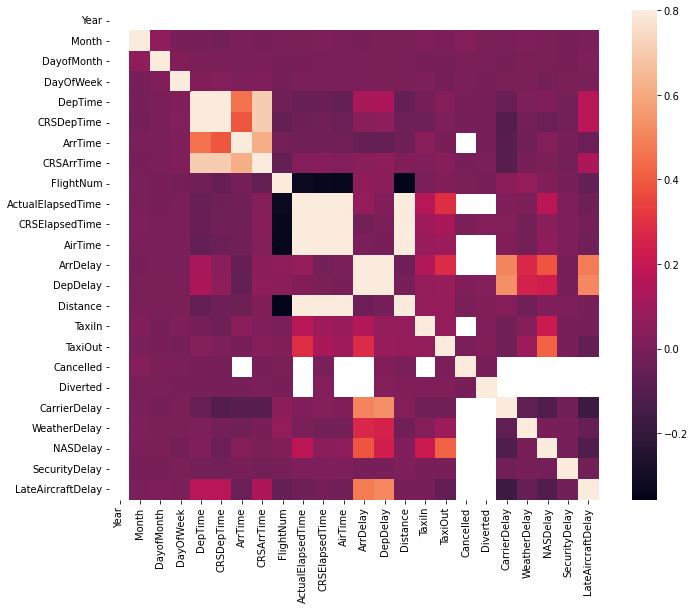

In [6]:


#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()




Through the correlation matrix we can see how some of the 29 variables in the dataset present multicollinearity, in other words, can be linearly predicted from the others. In order to have a better analysis and work with a lighter dataset, we are going to delete some of those unwanted variables and create new ones.
We can also make the following observations:
1. Only when Arrival Delay is longer than 15 minutes there's data about what caused the delay. Arrival Delay is the sum of CarrierDelay, WeatherDelay, NASDelay and LateAircraftDelay. In cases of cancellation or diversion there's no data related to delay causes.
2. More often than not, airports and carriers allocate a CRSElapsedTime higher than the actual time spent in the Taxi In + Taxi out + Airtime operations (Actual Elapsed Time). This is the reason why, when planes take off on time, landing usually takes place before the expected time! It also allows to absorb delay by late aircraft down the lane of chained flights.


In [14]:
df['DepDate'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')

#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in df:
    df.loc[df['ArrDelay'] <= 15, 'Status'] = 0
    df.loc[df['ArrDelay'] >= 15, 'Status'] = 1
    df.loc[df['ArrDelay'] >= 60, 'Status'] = 2
    df.loc[df['Diverted'] == 1, 'Status'] = 3
    df.loc[df['Cancelled'] == 1, 'Status'] = 4
    
    
#Cancellation cause
df.loc[df["CancellationCode"] =="A", 'CancellationCode'] = "0"
df.loc[df["CancellationCode"] =="B", 'CancellationCode'] = "1"
df.loc[df["CancellationCode"] =="C", 'CancellationCode'] = "2"

# dropping the unwanted data   
df = df.drop("Year",1) #Converted to date
df = df.drop("DayofMonth",1) #Converted to date
df = df.drop("DepTime",1) #Of the departure data we only keep the expected 
df = df.drop("DepDelay",1)
df = df.drop("ArrTime",1)
df = df.drop("CRSArrTime",1)
df = df.drop("ActualElapsedTime",1)
df = df.drop("CRSElapsedTime",1)
df = df.drop("Diverted",1)
df = df.drop("Cancelled",1)
df = df.drop("Distance",1)
df = df.drop("FlightNum",1)
df = df.drop("TailNum",1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/pytho

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


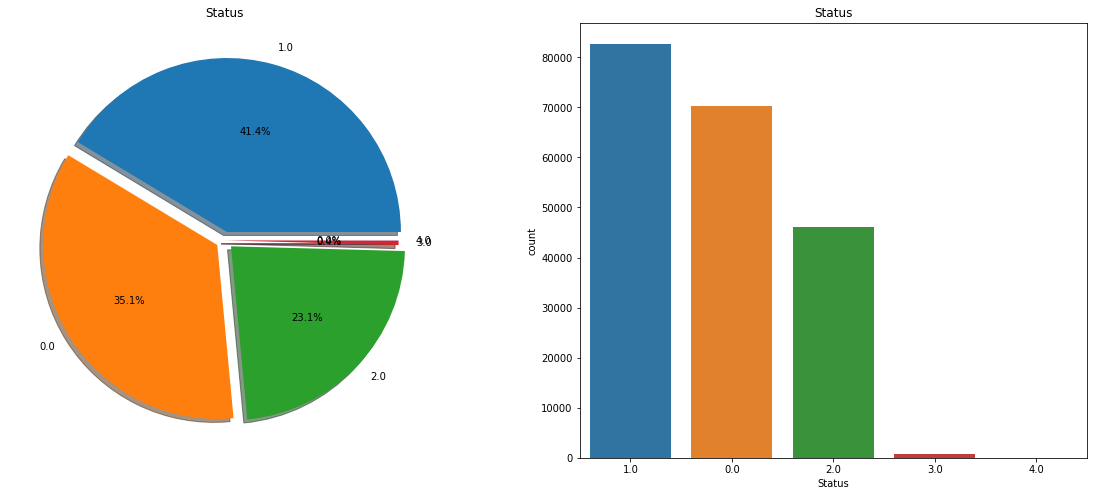

Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)


In [16]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = df['Status'].value_counts().index, data=df,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')


Find how much missing data there is per column:

In [17]:
display(df.isnull().sum())

Month                    0
DayOfWeek                0
CRSDepTime               0
UniqueCarrier            0
AirTime                871
ArrDelay               871
Origin                   0
Dest                     0
TaxiIn                 723
TaxiOut                 46
CancellationCode         0
CarrierDelay         71124
WeatherDelay         71124
NASDelay             71124
SecurityDelay        71124
LateAircraftDelay    71124
DepDate                  0
Status                   0
dtype: int64

In 2008, a whooping 64,4% of domestic flights in the US were delayed by more than 15 minutes. 35,8% of them (or 23,1% of total fligths) had delays of more than one hour! Another different interpretation is that 76,5% of flights have delay of one hour or less.
On the other hand, just a 0,03% of flights were cancelled and 0,4% were diverted.

Create new columns (average flight speed, whether it was late or not...).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


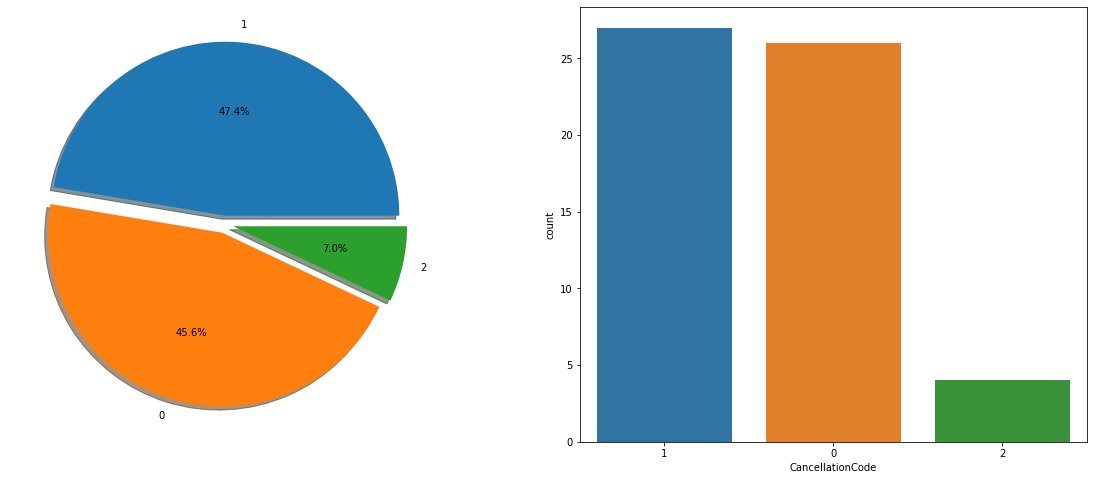

0 = carrier, 1 = weather, 2 = NAS


In [22]:
#show cancelled flights
CancFlights = df[(df.Status == 4)]

f,ax=plt.subplots(1,2,figsize=(20,8))
CancFlights['CancellationCode'].value_counts().plot.pie(explode=[0.05,0.05,0.05,],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot('CancellationCode', order = CancFlights['CancellationCode'].value_counts().index, data=CancFlights, ax=ax[1])
plt.show()


print('0 = carrier, 1 = weather, 2 = NAS')



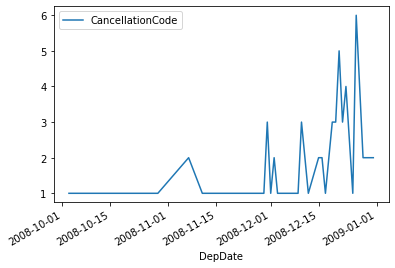

In [23]:
CancFlights[['DepDate','CancellationCode']].groupby(['DepDate']).count().plot()
plt.show()


During 2008, there were only cancellations in the last three months of the year (from October to December). Doing a bit of research we find that 2008 winter was unusual, especially in December, with coast-to-coast severe winter weather, including one low pressure system from December 9-12 that brought snow to Houston and New Orleans, severe storms and flooding to other parts of the South, and an ice storm that left more than 1.27 million homes and business without power in the Northeast.
The bad weather might actually be the reason behind all the cancellations, since for rest of the year there are no registered cancellations at all. The compounded effect of the flights cancelled affect other programmed flights down the lane.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


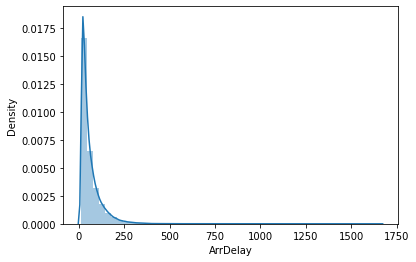

Skewness: 4.367706
Kurtosis: 45.264229


In [24]:
## Delayed flights

Delayedflights = df[(df.Status >= 1) &(df.Status < 3)]

#histogram

sns.distplot(Delayedflights['ArrDelay'])
plt.show()

#skewness and kurtosis
print("Skewness: %f" % Delayedflights['ArrDelay'].skew())
print("Kurtosis: %f" % Delayedflights['ArrDelay'].kurt())



It can be seen on the histogram and by the skewness and kurtosis indexes, that delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time.

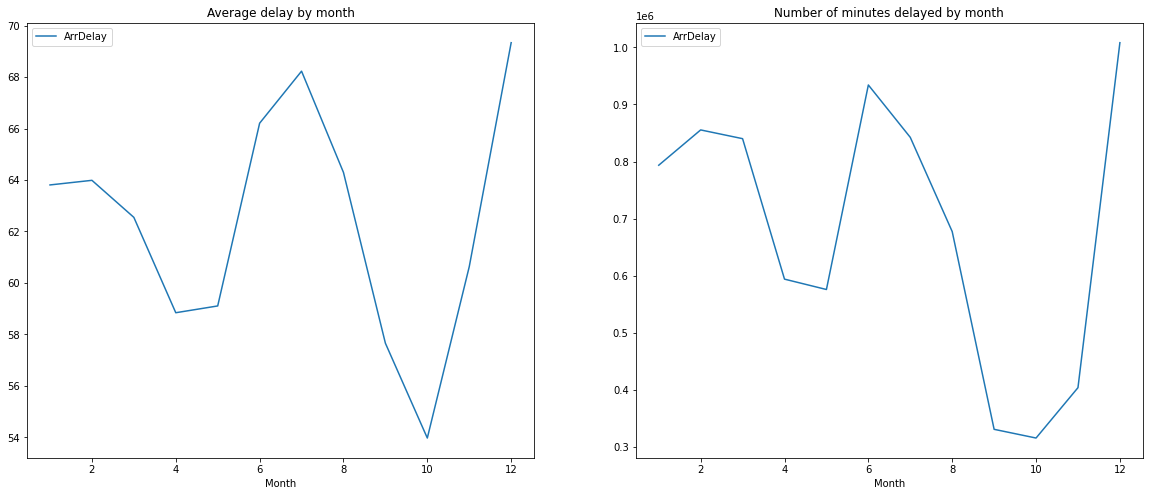

In [25]:


f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['Month','ArrDelay']].groupby(['Month']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by month')
Delayedflights[['Month','ArrDelay']].groupby(['Month']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by month')
plt.show()



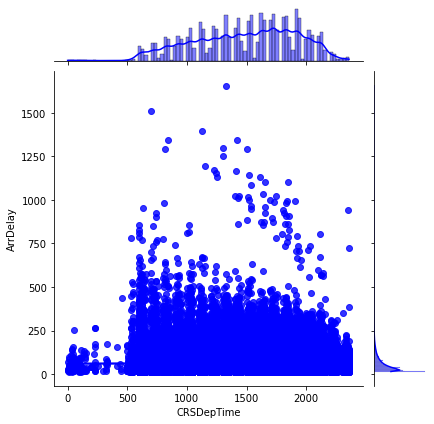

In [26]:


sns.jointplot(x='CRSDepTime',y='ArrDelay',data=Delayedflights,kind='reg', color='b',fit_reg = True)
plt.show()




Delays focused on February, June and December, with a peak on average delays on July 2008.
Regarding the time of the day the take off was programmed, it can be seen in the higher part of the scatterplot how the delays are concentrated in an hourly manner, focused on the hour. As the day goes on, there are more and more delays, but as it's shown in the center of the scatterplot, the delayed flights get divided into two groups: one with longer delays and other with shorter. One likely interpretation is that the delays generated by previous flights either increase or decrease in each following trip.




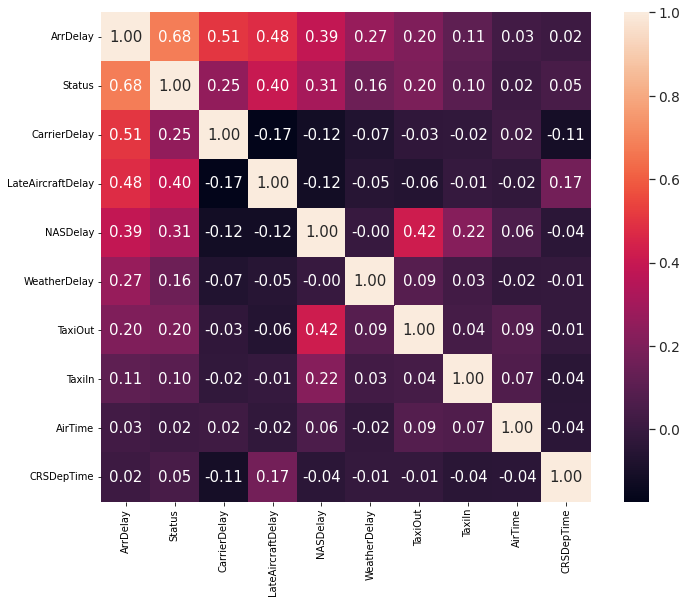

In [27]:
delcorrmat = Delayedflights.corr()

k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = delcorrmat.nlargest(k, 'ArrDelay')['ArrDelay'].index
cm = np.corrcoef(Delayedflights[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


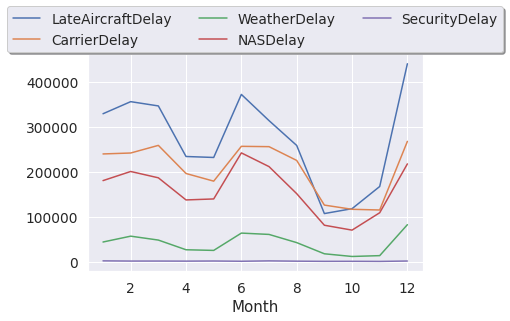

In [28]:
df2 = Delayedflights.filter(['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
df2 = df2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()

The correlation matrix identifies three main variables for delays: Late Aircraft Delay, Carrier Delay and NAS Delay. The graph corroborates this assumption, showing how those three variables create most of delays during the year. The variable Status can't be taken into account since it has been created 'ad hoc' and by it's own definition has a high correlation.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


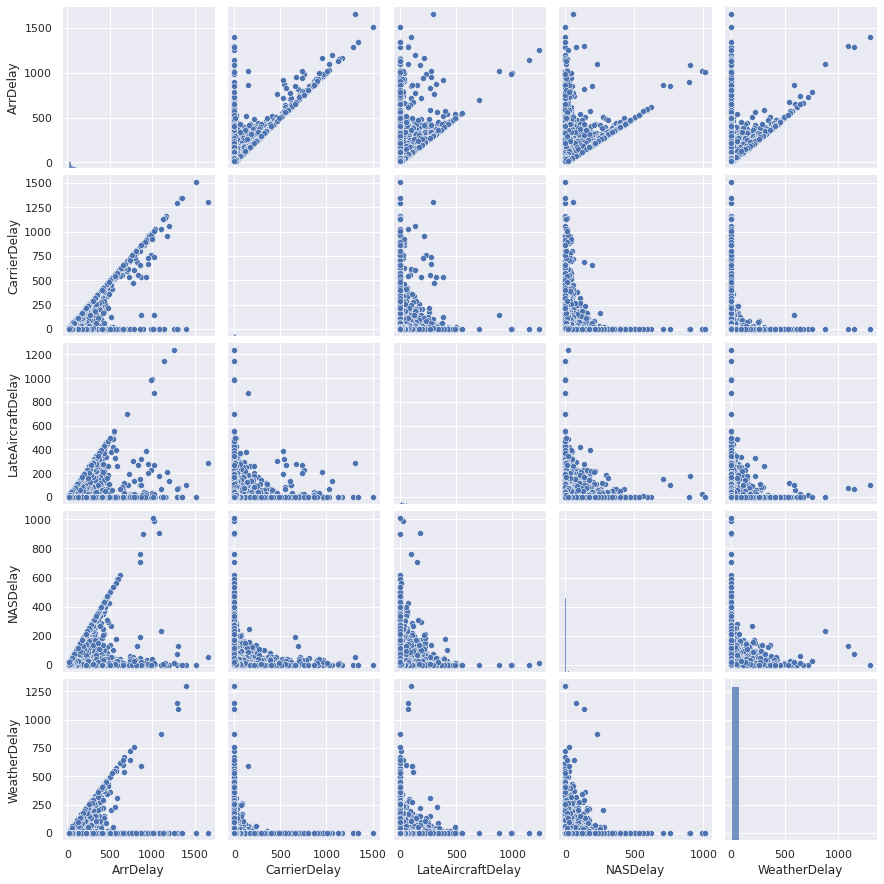

In [29]:
#scatterplot
sns.set()
cols = ['ArrDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']
sns.pairplot(Delayedflights[cols], size = 2.5)
plt.show()


Late Aircraft Delay seems to be the most important variable, not only due to its longer wait periods, but it's affected by the others due to the ripple effect and delay propagation. Its distribution is almost parallel to NAS Delay, and seems to be the compounded effect of the other delays minus the delay reduction from the alloted Elapsed time > Actual Elapsed Time in the flight operations.
However, analyzing the scatterplot, it doesn't seem to be a significant correlation between the types of delay themselves. A more in depth analysis, following the exact routes of the aircrafts and their connections and subsequent flights could help identifying the exact root cause to each delay, but that is not within the scope of this analysis.

In [32]:
#carrier delays
print(df['UniqueCarrier'].value_counts())


WN    39118
AA    19629
MQ    14727
UA    14564
OO    13628
DL    11734
XE    10734
CO    10411
US    10208
EV     8377
NW     8278
FL     7302
YV     6915
B6     5704
OH     5443
9E     5435
AS     4032
F9     2924
HA      760
AQ       77
Name: UniqueCarrier, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


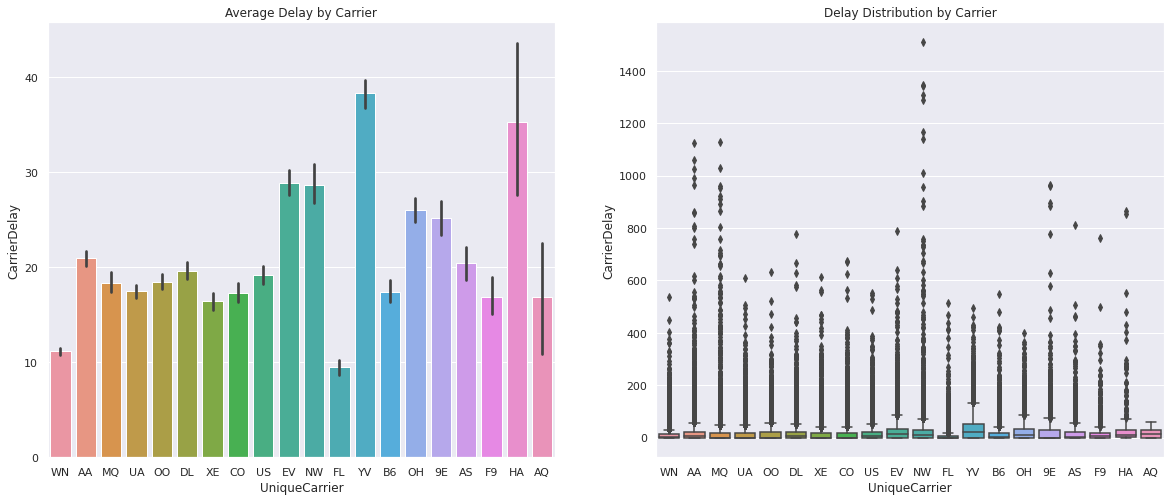

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [33]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('UniqueCarrier','CarrierDelay', data=Delayedflights,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[0].set_title('Average Delay by Carrier')
sns.boxplot('UniqueCarrier','CarrierDelay', data=Delayedflights,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])


4 from the top 5 companies in the domestic market (Southwest Airlines (WN), American Eagle Airlines (MQ), United Airlines (UA) and Skywest Airlines (OO) create an average delay below the mean (19 minutes). Southwest Airlines, with an outstanding 11.7 minutes per flight, the second lowest of all the carriers.
Carriers with higher average delay generation are Mesa Airlines (YV) with 37.63 minutes per flight, Hawaian Airlines (HA) with 33.76 minutes per flight and ExpressJet (EV) with 29,70. As we go from left to right in the barplot, it can be seen how airlines with lower volumen of flights tend to have a higher Carrier Delay (with the exception of AirTrans, integrated into Southwest in 2014); so it seems like size matters.
On the other hand, taking responsibility of a higher number of flights results in a higher chance of having an extreme waiting situation. Northwest, American Eagle and American Airlines registered the maximum Carrier Delay for 2008.

In [34]:
#Having more than 300 airports on the dataset, we are going to focus on the top20. 
Top20airports = Delayedflights[(Delayedflights.Origin == 'ORD') | (Delayedflights.Origin == 'ATL') |
                               (Delayedflights.Origin == 'DFW') | (Delayedflights.Origin == 'DEN') |
                               (Delayedflights.Origin == 'EWR') | (Delayedflights.Origin == 'LAX') | 
                               (Delayedflights.Origin == 'IAH') | (Delayedflights.Origin == 'PHX') |
                               (Delayedflights.Origin == 'DTW') | (Delayedflights.Origin == 'SFO') | 
                               (Delayedflights.Origin == 'LAS') | (Delayedflights.Origin == 'DEN') |
                               (Delayedflights.Origin == 'ORD') | (Delayedflights.Origin == 'JFK') | 
                               (Delayedflights.Origin == 'CLT') | (Delayedflights.Origin == 'LGA') |
                               (Delayedflights.Origin == 'MCO') | (Delayedflights.Origin == 'MSP') | 
                               (Delayedflights.Origin == 'BOS') | (Delayedflights.Origin == 'PHL')]

print(Top20airports['Origin'].value_counts())

ORD    9265
ATL    9136
DFW    6378
DEN    4854
EWR    3671
LAX    3431
IAH    3396
PHX    3198
DTW    3186
LAS    3086
SFO    3084
JFK    2510
CLT    2457
LGA    2397
MSP    2309
MCO    2286
BOS    2110
PHL    2027
Name: Origin, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


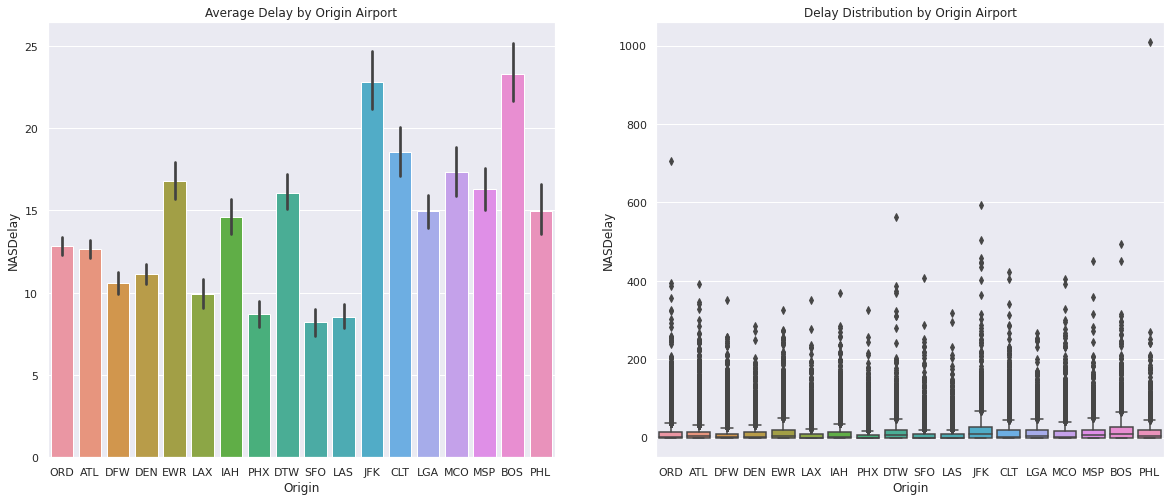

['ORD: Chicago', 'ATL: Atlanta', 'DFW: Dallas Fortworth', 'DEN: Denver', 'EWR: Newark', 'LAX: Los Ángeles', 'IAH: Houston', 'PHX: Phoenix', 'DTW: Detroit', 'SFO: San Francisco', 'LAS: Las Vegas', 'JFK: New York', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'MCO: Orlando', 'MSP: Minneapolis', 'BOS Boston', 'PHL Philadelphia']


In [36]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Origin','NASDelay', data=Top20airports,ax=ax[0], order=['ORD', 'ATL', 'DFW', 'DEN','EWR','LAX','IAH','PHX','DTW',
                                                                     'SFO', 'LAS','JFK','CLT', 'LGA','MCO','MSP','BOS','PHL'])
ax[0].set_title('Average Delay by Origin Airport')
sns.boxplot('Origin','NASDelay', data=Top20airports,ax=ax[1], order=['ORD', 'ATL', 'DFW', 'DEN','EWR','LAX','IAH','PHX','DTW',
                                                                     'SFO', 'LAS','JFK','CLT', 'LGA','MCO','MSP','BOS','PHL'])
ax[1].set_title('Delay Distribution by Origin Airport')
plt.close(2)
plt.show()

print(['ORD: Chicago', 'ATL: Atlanta', 'DFW: Dallas Fortworth', 'DEN: Denver','EWR: Newark','LAX: Los Ángeles',
       'IAH: Houston','PHX: Phoenix','DTW: Detroit','SFO: San Francisco','LAS: Las Vegas','JFK: New York','CLT: Charlotte',
       'LGA: La Guardia (NY)','MCO: Orlando','MSP: Minneapolis','BOS Boston','PHL Philadelphia'])

There seems to be a correlation between the number of flights operated and NASDelay, with the exceptions of Newark (EWR), Houston (IAH) and Detroit (DTW). From Chicago Airport (ORD) to Las Vegas (LAS) a descending average NASDelay per flight can be seen. In less busy airports (less than 30.000 flights per year), delays increase once again. This seems to entail that there are two sizes of airport, and that the size, the number of flights are correlated with the delays.
While this tendency might be true in some cases, this reasoning is flawed. The dataset is limited to domestic flights, but airports like LAX, JFK and Atlanta have a higher operations volume due to being notorious international airports, so we advise taking the conclusions with a pinch of salt.

### - Exercise 3

Export the dataset clean and with the new columns to Excel.

In [ ]:
 df.to_csv('mydataframe.csv', sep='\t')

In [ ]:
df.to_csv('/content/drive/My Drive/Delayed_Flights_processed.csv', encoding='utf-8', index=False)